# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    # if (i % 50 == 0 and i >= 50):
    #     set_count += 1
    #     record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'q=' + city + '&appid=' + weather_api_key + '&units=' + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naze
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | riberalta
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | miri
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | selibaby
Processing Record 11 of Set 1 | la'ie
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | navia
Processing Record 16 of Set 1 | kiruna
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | wudil
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | codrington
Processing Record 21 of Set 1 | otjimbingwe
Processing Record 22 of Set 1 | padang
Process

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naze,28.3667,129.4833,23.51,50,41,4.48,JP,32400
1,port-aux-francais,-49.3500,70.2167,2.17,80,6,7.18,TF,18000
2,blackmans bay,-43.0167,147.3167,12.63,58,23,2.77,AU,39600
3,riberalta,-10.9833,-66.1000,27.99,60,100,0.92,BO,-14400
4,waitangi,-43.9535,-176.5597,13.79,76,100,7.60,NZ,49500


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,23.51,50,41,4.48,JP,32400
1,port-aux-francais,-49.3500,70.2167,2.17,80,6,7.18,TF,18000
2,blackmans bay,-43.0167,147.3167,12.63,58,23,2.77,AU,39600
3,riberalta,-10.9833,-66.1000,27.99,60,100,0.92,BO,-14400
4,waitangi,-43.9535,-176.5597,13.79,76,100,7.60,NZ,49500


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

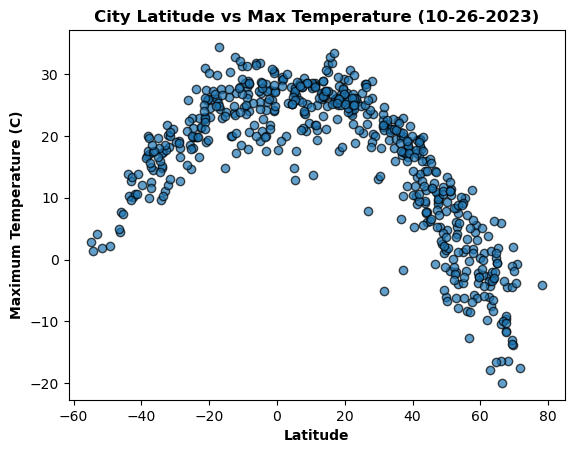

In [10]:
# Build scatter plot for latitude vs. temperature
temp_values = city_data_df['Max Temp']
lat_values = city_data_df['Lat']

plt.scatter(lat_values, temp_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Maximum Temperature (C)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Max Temperature (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})

# Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()

#### Latitude Vs. Humidity

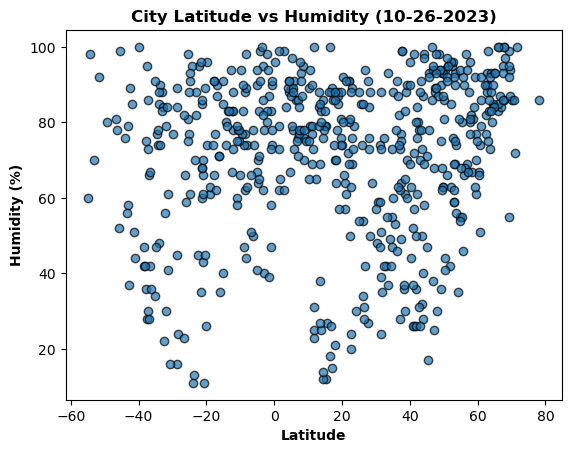

In [11]:
# Build the scatter plots for latitude vs. humidity
humidity_values = city_data_df['Humidity']

plt.scatter(lat_values, humidity_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Humidity (%)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Humidity (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})

# Save the figure
plt.savefig("output_data/Fig2.png")

# # Show plot
plt.show()

#### Latitude Vs. Cloudiness

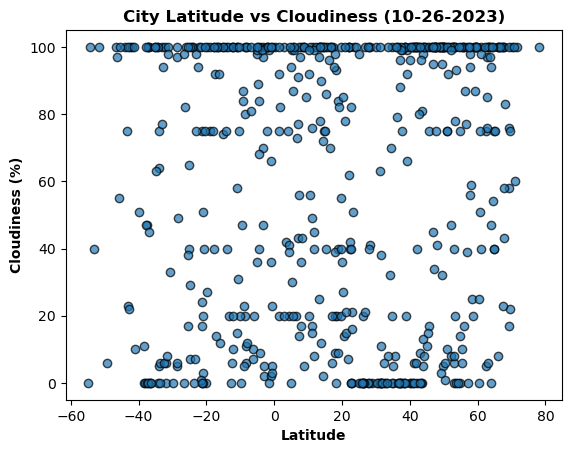

In [12]:
# Build the scatter plots for latitude vs. cloudiness
cloudy_values = city_data_df['Cloudiness']

plt.scatter(lat_values, cloudy_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Cloudiness (%)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Cloudiness (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

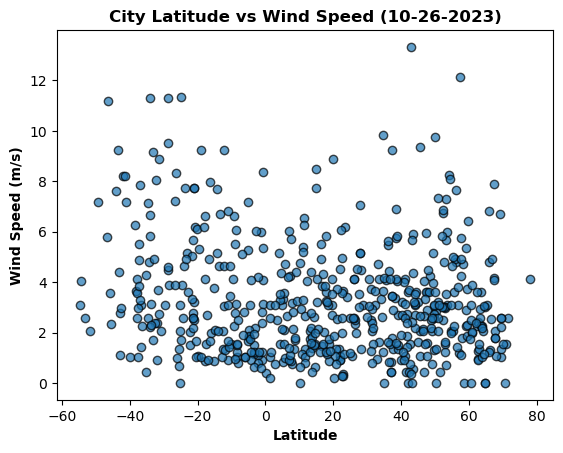

In [13]:
# Build the scatter plots for latitude vs. wind speed
wind_values = city_data_df['Wind Speed']

plt.scatter(lat_values, wind_values, marker='o', alpha=0.70, edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude', fontdict={'weight':'bold'})
plt.ylabel('Wind Speed (m/s)', fontdict={'weight':'bold'})
plt.title('City Latitude vs Wind Speed (10-26-2023)', fontdict={'weight':'bold',
                                                                    'size':'12'})

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def linear_regression_model(x, y, title, x_label, y_label, x_coord, y_coord):

    # First perform the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    
    # Calculate and print the y = mx + b line
    regress_line = x * slope + intercept 
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Create the scatter plot of the data
    plt.scatter(x, y, color='steelblue', linewidth=2)

    # Plot the linear regression line
    plt.plot(x, regress_line, color='crimson')

    # Set plot labels, line equation, and title 
    plt.xlabel(x_label, fontdict={'weight':'bold'})
    plt.ylabel(y_label, fontdict={'weight':'bold'})
    plt.title(title, fontdict={'weight':'bold', 'fontsize':'12'})
    plt.annotate(line_eq, (x_coord, y_coord), fontsize=15, color='crimson')

    # Print the r-value
    print(f'The r-squared is: {rvalue**2}')
    # Show the plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naze,28.3667,129.4833,23.51,50,41,4.48,JP,32400
5,miri,4.4148,114.0089,25.08,88,20,1.54,MY,28800
7,saipan,15.1355,145.7010,30.39,79,40,4.12,MP,36000
8,selibaby,15.1590,-12.1829,31.55,12,86,3.21,MR,0
9,la'ie,21.6477,-157.9253,30.58,72,7,1.34,US,-36000


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,2.17,80,6,7.18,TF,18000
2,blackmans bay,-43.0167,147.3167,12.63,58,23,2.77,AU,39600
3,riberalta,-10.9833,-66.1000,27.99,60,100,0.92,BO,-14400
4,waitangi,-43.9535,-176.5597,13.79,76,100,7.60,NZ,49500
6,avarua,-21.2078,-159.7750,23.03,60,75,5.66,CK,-36000


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7753437259321188


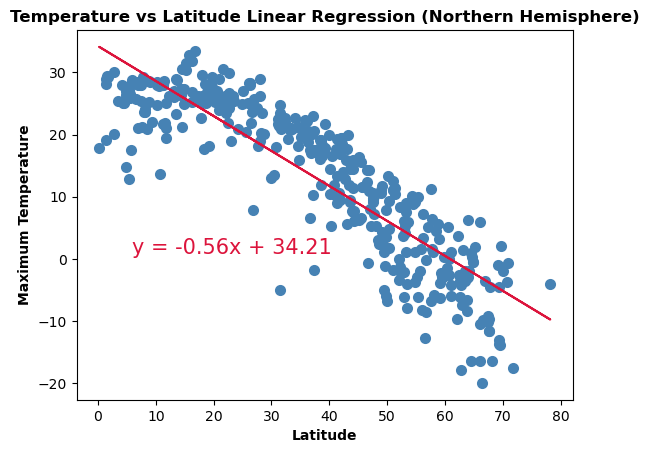

In [20]:
# Linear regression on Northern Hemisphere
# Set the northern x and y values
northern_lat = northern_hemi_df['Lat']
northern_temp = northern_hemi_df['Max Temp']

# Put the values into the linear regression model 
linear_regression_model(northern_lat, northern_temp, 'Temperature vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Maximum Temperature', 5.8, 0.8)

The r-squared is: 0.6426872630750718


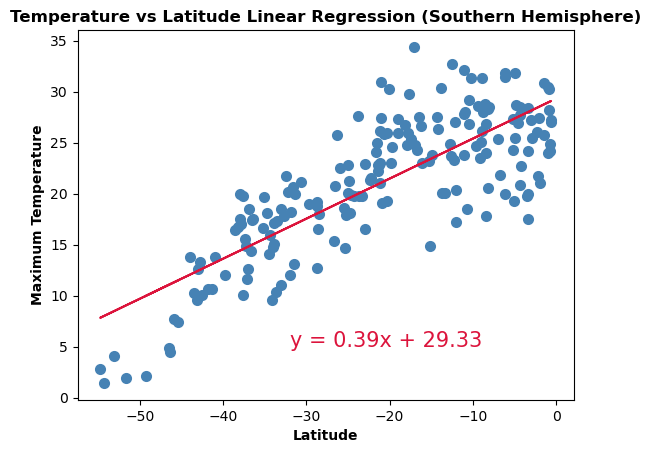

In [21]:
# Linear regression on Southern Hemisphere
# Set the southern x and y values
southern_lat = southern_hemi_df['Lat']
southern_temp = southern_hemi_df['Max Temp'] 

linear_regression_model(southern_lat, southern_temp, 'Temperature vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Maximum Temperature', -32.0, 5.0)

**Discussion about the linear relationship:** In plotting maximum temperature versus latitude, the data shows that, in the northern hemisphere, as latitude increases (that is, as we move away from the equator), the max temperature decreases. In the southern hemisphere, as latitude increases (that is, as we move towards the equator), the max temperature increases. According to the r-value, there is a strong negative correlation between maximum temperature and latitiude in the northern hemisphere, and a moderate positive correlation between latitude and maximum temperature in the southern hemisphere. Both indicate that the maximum temperature increases the closer we move towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.022151649544416212


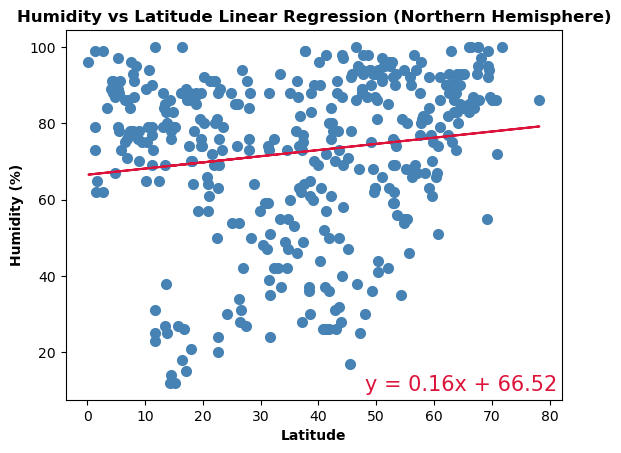

In [24]:
# Northern Hemisphere
# Set the y variable for humidity 
northern_humid = northern_hemi_df['Humidity']

# Pass into the linear regression model
linear_regression_model(northern_lat, northern_humid, 'Humidity vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Humidity (%)', 48.0, 10.0)

The r-squared is: 0.0317692885929019


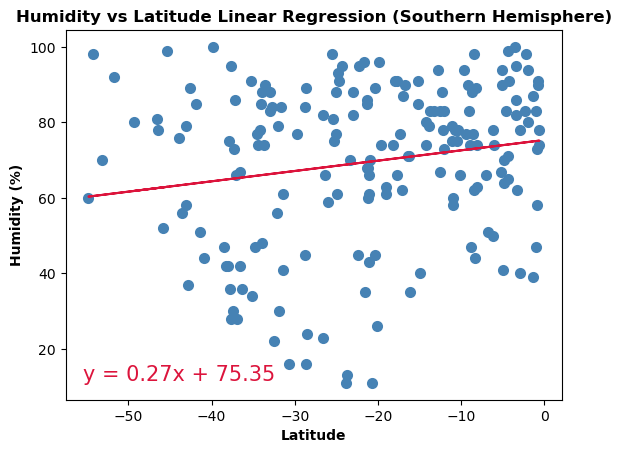

In [32]:
# Southern Hemisphere
# Set the y variable for humidity 
southern_humid = southern_hemi_df['Humidity']

# Pass into linear regression model
linear_regression_model(southern_lat, southern_humid, 'Humidity vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Humidity (%)', -55.5, 11.5)

**Discussion about the linear relationship:** The graphs plotted above show a very, very weak correlation between latitude and humidity. Based on an r-value of less than 0.05 for both, we can conclude that humidity for a given city cannot be reliably predicted based on latitude alone.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010704061569299948


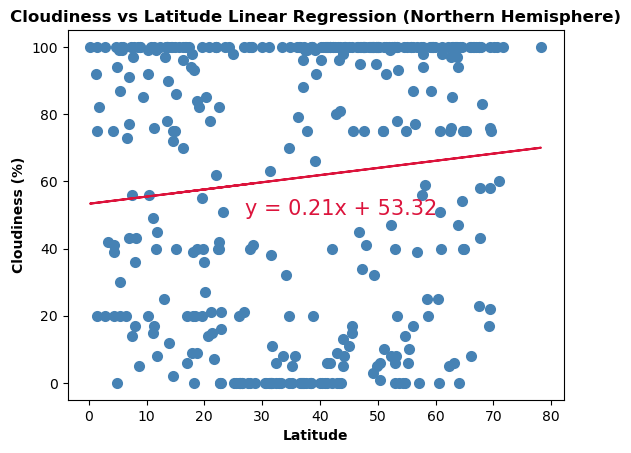

In [36]:
# Northern Hemisphere
# Set the y variable for cloudiness
northern_cloud = northern_hemi_df['Cloudiness']

# Pass into linear regression model
linear_regression_model(northern_lat, northern_cloud, 'Cloudiness vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Cloudiness (%)', 27.0, 50.0)

The r-squared is: 0.001286635626667682


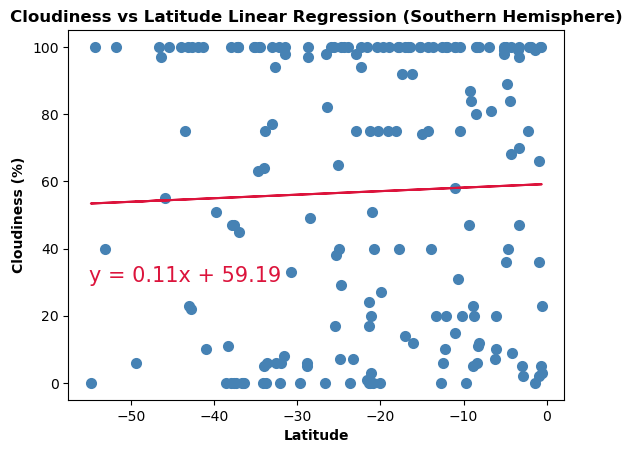

In [42]:
# Southern Hemisphere
# Set the y variable for cloudiness
southern_cloud = southern_hemi_df['Cloudiness']

# Pass into linear regression model
linear_regression_model(southern_lat, southern_cloud, 'Cloudiness vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Cloudiness (%)', -55.0, 30.0)

**Discussion about the linear relationship:** Similar to the plots showing humidity versus latitude, the plots showing cloudiness versus latitude show practically no correlation. We can conclude that cloudiness for a given city cannot be reliably predicted based on latitude alone.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.004321181103027122


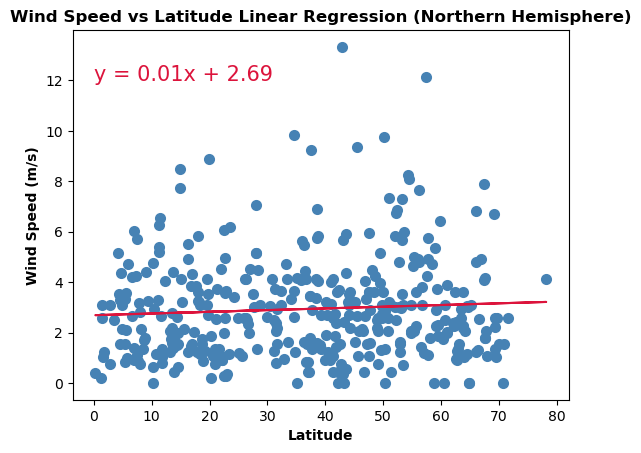

In [43]:
# Northern Hemisphere
# Set the y variable for wind speed
northern_wind = northern_hemi_df['Wind Speed']

# Pass into the linear regression model
linear_regression_model(northern_lat, northern_wind, 'Wind Speed vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Wind Speed (m/s)', 0.0, 12.0)

The r-squared is: 0.06919899078872821


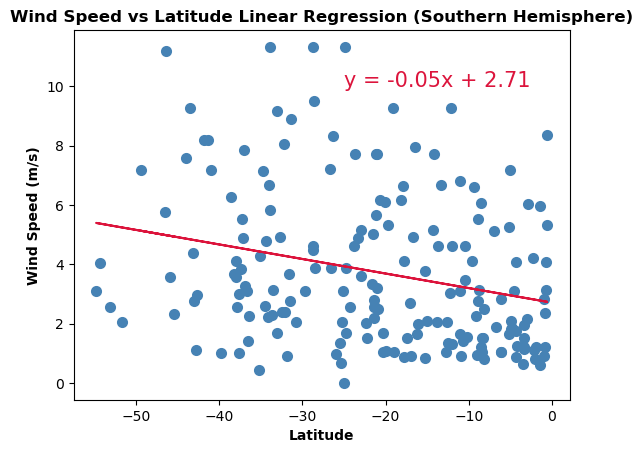

In [47]:
# Southern Hemisphere
# Set the y variable for wind speed
southern_wind = southern_hemi_df['Wind Speed']

# Pass into the linear regression model
linear_regression_model(southern_lat, southern_wind, 'Wind Speed vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Wind Speed (m/s)', -25.0, 10.0)

**Discussion about the linear relationship:** The plots above for the northern and southern hemisphere both show little to no correlation between wind speed and latitude, with r-values both close to zero. Once again, we can conclude that wind speed for a given city cannot be reliably predicted using latitude alone.